In [1]:
import os 
from general_plot import *

model_name = model_name_list[1] 


[WARNING]: not equal number in x_axis, u_bes != u_random
u_bes: [ 1  2  3  4  5  6  7  8  9 10 11]
u_random: [   1    4   15   51  153  427 1127 2858]


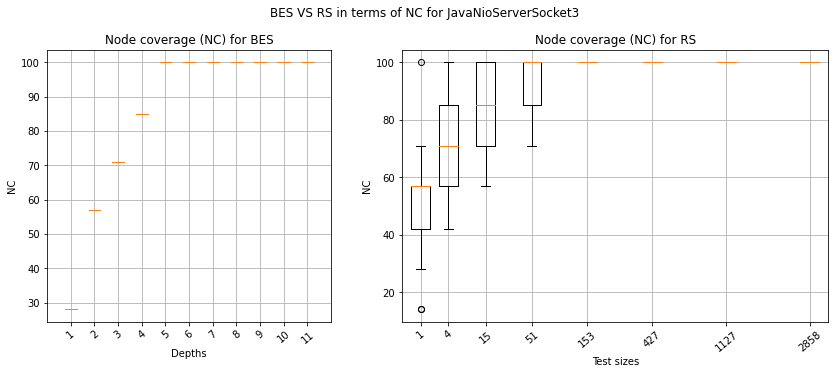

In [2]:

# repeat multi_times for each model and for each loopOpt
# init
loopOpt = False

bes_csv, random_csv, u_bes, u_random =  get_csv_unique(model_name, loopOpt)


# positions=[1, 2, 4,   6, 9, 12, 16,    20]
# positions=[1, 2, 3.5, 6, 9, 13, 17.5, 22.5] 


#nc 
data_map = {
    'need_positions' : True,
    'need_xtick' : True,
    'positions' : [1, 2.5, 4.5, 7, 10, 13.5, 17.5, 22],
    'model_name': model_name,
    'loopOpt': bool_to_str(loopOpt),
    
    'bes_title': 'Node coverage (NC) for BES',
    'rand_title': 'Node coverage (NC) for RS',
    
    'x_bes_label': 'Depths',
    'x_rand_label': 'Test sizes',
    
    'box_width_bes' : .6,
    'box_width_rand' : 1,
    
    'x_bes_lim': 12,
    'x_rand_lim' : 23,
    
    'y_bes_label': 'NC',
    'y_rand_label': 'NC',
    
    'width_bes_ratio': 1,
    'width_rand_ratio': 1.5,
    
    'distance_to_figures': 1,
    'fig_width': 14


}


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', 'nc', u_bes, u_random, data_map)
    

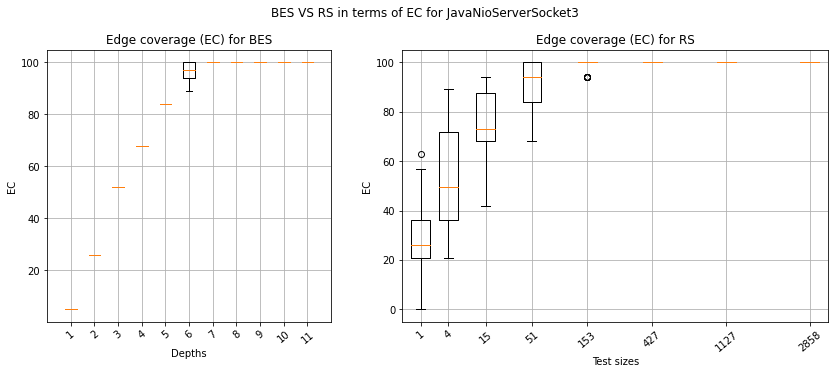

In [3]:
# ec 
coverage = 'EC'
data_map['bes_title'] = f'Edge coverage ({coverage}) for BES'
data_map['y_bes_label'] = coverage
# 'width_ratio': 1

data_map['rand_title'] = f'Edge coverage ({coverage}) for RS'
data_map['y_rand_label'] = coverage
# 'width_ratio': 1.5


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', coverage.lower(),
                         u_bes, u_random, data_map)



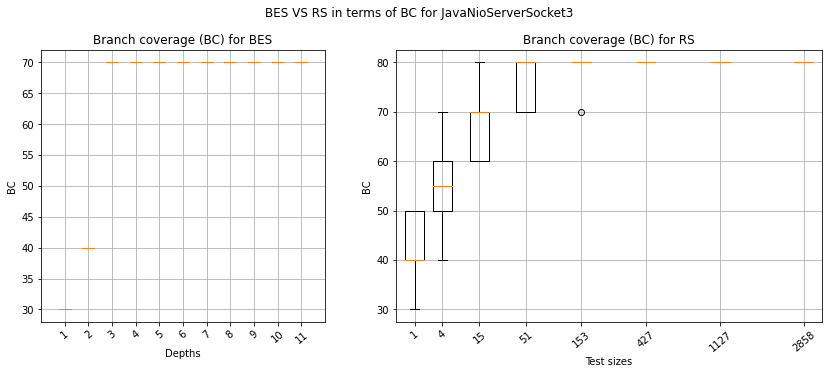

In [4]:
# bc
coverage = 'BC'  #TODO here bc are the same
data_map['bes_title'] = f'Branch coverage ({coverage}) for BES'
data_map['y_bes_label'] = coverage
# 'width_ratio': 1

data_map['rand_title'] = f'Branch coverage ({coverage}) for RS'
data_map['y_rand_label'] = coverage
# 'width_ratio': 1.5


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', f'total_{coverage.lower()}',
                         u_bes, u_random, data_map)
    

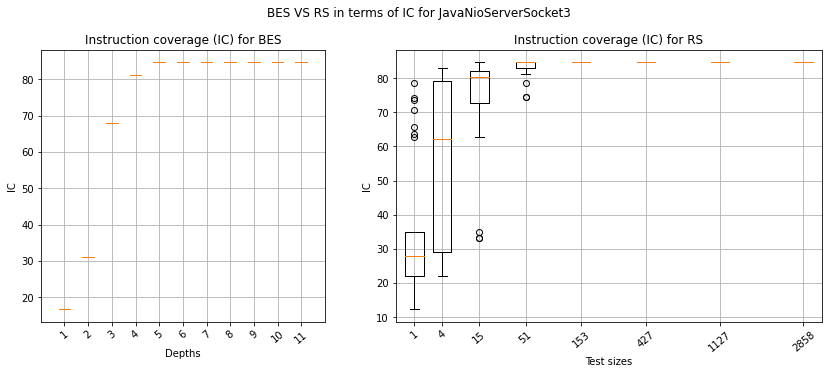

In [5]:
# ic
coverage = 'IC'
data_map['bes_title'] = f'Instruction coverage ({coverage}) for BES'
data_map['y_bes_label'] = coverage
# 'width_ratio': 1

data_map['rand_title'] = f'Instruction coverage ({coverage}) for RS'
data_map['y_rand_label'] = coverage
# 'width_ratio': 1.5


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', f'total_{coverage.lower()}',
                         u_bes, u_random, data_map)
    

depth 1 --> [1]
depth 2 --> [4]
depth 3 --> [15]
depth 4 --> [51]
depth 5 --> [153]
depth 6 --> [427]
depth 7 --> [1127]
depth 8 --> [2852, 2853, 2854, 2855, 2856, 2857, 2858, 2859, 2860, 2861, 2862]
depth 9 --> [7040, 7044, 7023, 7024, 7026, 7027, 7028, 7029, 7030, 7031, 7032, 7033, 7034, 7036, 7037, 7038, 7039]
depth 10 --> [16976, 16977, 16981, 16984, 16985, 16986, 16989, 16990, 16992, 16994, 16995, 16996, 16998, 16999, 17000, 17001, 17003, 17004, 17005, 17009]
depth 11 --> [40579, 40581, 40582, 40583, 40585, 40586, 40587, 40589, 40590, 40595, 40598, 40605, 40612, 40551, 40559, 40560, 40561, 40562, 40563, 40565, 40566, 40570, 40571, 40572, 40573]


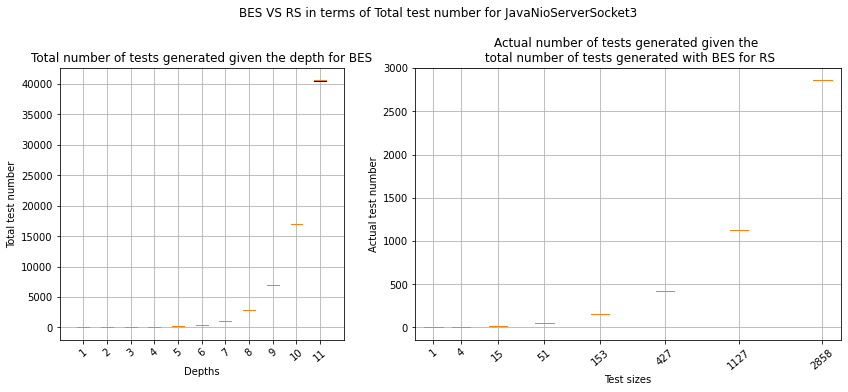

In [6]:
# total_test
creteria = 'total_tests'
data_map['bes_title'] = f'Total number of tests generated given the depth for BES'
data_map['y_bes_label'] = 'Total test number'
# 'width_ratio': 1
data_map['distance_to_figures'] = 1.05

data_map['rand_title'] = f'Actual number of tests generated given the \n total number of tests generated with BES for RS'
data_map['y_rand_label'] = 'Actual test number'
# 'width_ratio': 1.5

total_tests = extract_unique_as_map(bes_csv, u_bes, 'depth', creteria)
print_map(total_tests, 'depth')


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', creteria,
                         u_bes, u_random, data_map)



depth 1 --> [1.867876052856445, 1.429033279418945, 2.010962963104248, 1.9424071311950684, 1.888033151626587, 2.141307830810547, 1.8872201442718504, 2.1135029792785645, 2.0248608589172363, 1.992674827575684, 2.0414929389953613, 2.014503002166748, 2.006291389465332, 2.037163019180298, 2.125317096710205, 2.095149040222168, 2.1039681434631348, 2.0612196922302246, 2.0433709621429443, 2.0403871536254883, 1.9313130378723145, 1.9200258255004885, 1.964274883270264, 2.055680990219116, 2.003056764602661, 2.051994800567627, 2.0144338607788086, 2.0603299140930176, 2.111290693283081, 1.9957079887390137, 1.8371851444244385, 1.8933000564575195, 1.8917131423950195, 1.94498872756958, 1.984544038772583, 1.9970850944519043, 1.96399998664856, 1.913918256759644, 1.8954379558563232, 2.102288722991944, 2.0019619464874268, 2.007200002670288, 2.011500835418701, 2.0692028999328613, 2.039923906326294, 2.136507987976074, 2.088324785232544, 2.017254114151001, 2.117419958114624, 2.142651081085205, 2.0387120246887207

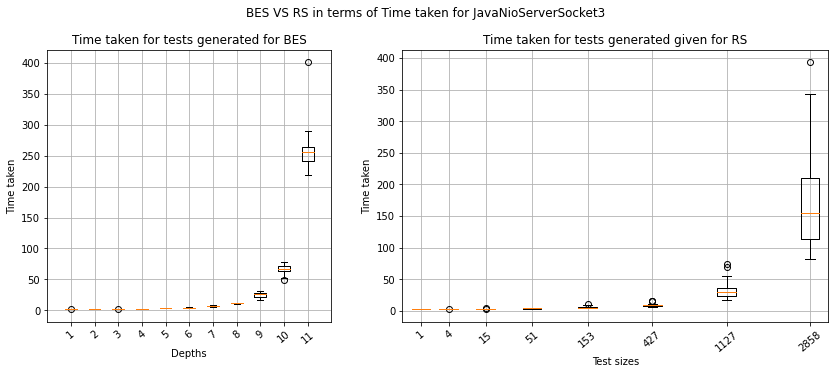

In [7]:
# time_taken
creteria = 'time_taken'
data_map['bes_title'] = f'Time taken for tests generated for BES'
data_map['y_bes_label'] = 'Time taken'
data_map['distance_to_figures'] = 1

data_map['rand_title'] = f'Time taken for tests generated given for RS'
data_map['y_rand_label'] = 'Time taken'
data_map['width_rand_ratio']: 1

time_taken = extract_unique_as_map(bes_csv, u_bes, 'depth', creteria)
print_map(time_taken, 'depth')

compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', creteria,
                         u_bes, u_random, data_map)



In [8]:
# trie total path 
creteria = 'trie_total_path'


trie_total_path = extract_unique_as_map(bes_csv, u_bes, 'depth', creteria)
print_map(trie_total_path, 'depth')

print("**********************")
latex = to_latex('total trie path', trie_total_path)
print(latex)
print("**********************")

# fig, ax = plt.subplots(figsize=(12, 6))

data_map['bes_title'] = f'Total number of test generated by the \ntrie given the depth for BES'
data_map['y_bes_label'] = 'Total test number in the trie'

# plot_one_box(bes_csv, 'depth', creteria, u_bes, data_map)



depth 1 --> [1]
depth 2 --> [4]
depth 3 --> [15]
depth 4 --> [51]
depth 5 --> [165]
depth 6 --> [518]
depth 7 --> [1599]
depth 8 --> [4883]
depth 9 --> [14814]
depth 10 --> [44752]
depth 11 --> [134833]
**********************
\begin{table}[total trie path]
\begin{tabular}{|c|c|}
\hline
& Depth & Total number of tests generated by the trie \\ \hline \hline
1 & 1        \\ \hline
2 & 4        \\ \hline
3 & 15        \\ \hline
4 & 51        \\ \hline
5 & 165        \\ \hline
6 & 518        \\ \hline
7 & 1599        \\ \hline
8 & 4883        \\ \hline
9 & 14814        \\ \hline
10 & 44752        \\ \hline
11 & 134833        \\ \hline
\end{tabular}
\end{table}
**********************


trie_total   : [1, 4, 15, 51, 165, 518, 1599, 4883, 14814, 44752, 134833]
actual before: [1, 4, 15, 51, 153, 427, 1127, 2852, 7040, 16976, 40579]
actual after : [1, 4, 15, 51, 153, 427, 1127, 2858, 7040, 16976, 40579]
**********************
\begin{table}[trie vs actual]
\begin{tabular}{|c||c|c|}
\hline
& Depth & Total number of tests generated by the trie & Actual number of tests generated by Modbat \\ \hline \hline
1 & 1 & 1  \\ \hline
2 & 4 & 4  \\ \hline
3 & 15 & 15  \\ \hline
4 & 51 & 51  \\ \hline
5 & 165 & 153  \\ \hline
6 & 518 & 427  \\ \hline
7 & 1599 & 1127  \\ \hline
8 & 4883 & 2858  \\ \hline
9 & 14814 & 7040  \\ \hline
10 & 44752 & 16976  \\ \hline
11 & 134833 & 40579  \\ \hline
\end{tabular}
\end{table}
**********************


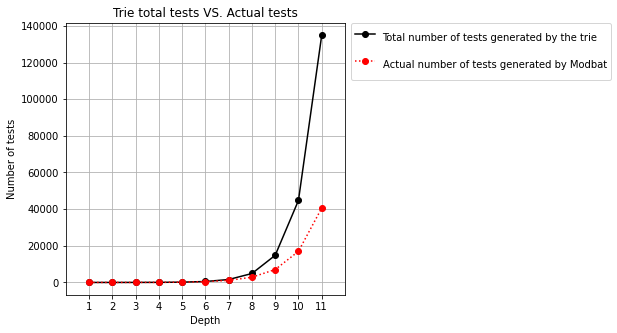

In [9]:

y1 = extract_unique_as_list(bes_csv, u_bes, 'depth', 'trie_total_path')
print(f'trie_total   : {y1}')
y2 = extract_unique_as_list(bes_csv, u_bes, 'depth', 'total_tests')
print(f'actual before: {y2}')
y2[7] = 2858
print(f'actual after : {y2}')


print("**********************")
latex = to_latex_compare('trie vs actual', u_bes, y1, y2)
print(latex)
print("**********************")




data_map['bes_title'] = f'Trie total tests VS. Actual tests'
data_map['x_bes_label'] = 'Depth'
data_map['y_bes_label'] = 'Number of tests'

data_map['y1_label'] = 'Total number of tests \n generated by the trie'
data_map['y2_label'] = 'Actual number of tests \n generated by Modbat'


plot_one_linear(u_bes, y1, y2, data_map)


[WARNING]: not equal number in x_axis, u_bes != u_random
u_bes: [ 1  2  3  4  5  6  7  8  9 10 11]
u_random: [   1    4   15   49  140  364  879 2009]


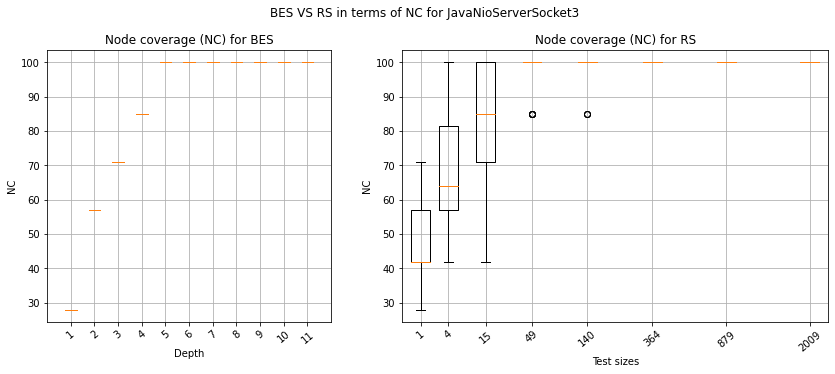

In [10]:
loopOpt = True

bes_csv, random_csv, u_bes, u_random =  get_csv_unique(model_name, loopOpt)


#nc 
data_map['loopOpt'] = bool_to_str(loopOpt)
# data_map['positions'] = [1, 2,   3.5, 6, 9,  13,   17.5, 22.5] 
data_map['positions'] =   [1, 2.5, 4.5, 7, 10, 13.5, 17.5, 22]
coverage ='NC'

data_map['bes_title'] = f'Node coverage ({coverage}) for BES'
data_map['y_bes_label'] = coverage

data_map['rand_title'] = f'Node coverage ({coverage}) for RS'
data_map['y_rand_label'] = coverage


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', 'nc', u_bes, u_random, data_map)
    

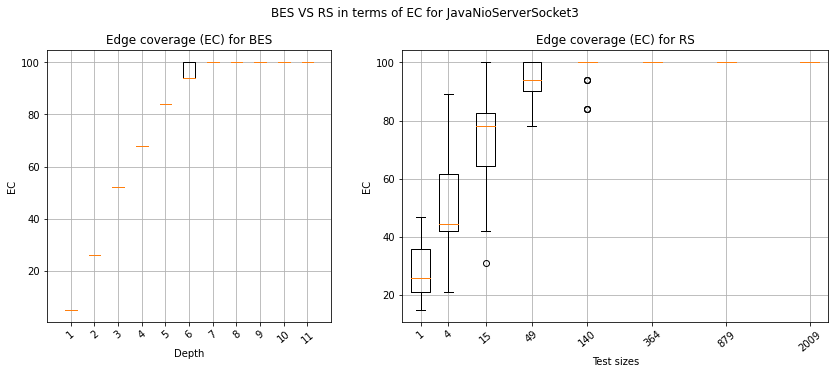

In [11]:
# ec 
coverage = 'EC'
data_map['bes_title'] = f'Edge coverage ({coverage}) for BES'
data_map['y_bes_label'] = coverage
# 'width_ratio': 1

data_map['rand_title'] = f'Edge coverage ({coverage}) for RS'
data_map['y_rand_label'] = coverage
# 'width_ratio': 1.5


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', coverage.lower(),
                         u_bes, u_random, data_map)



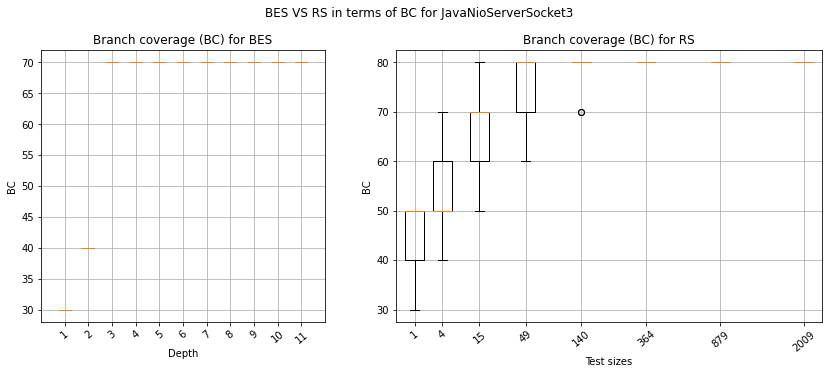

In [12]:
# bc
coverage = 'BC'  #TODO here bc are the same
data_map['bes_title'] = f'Branch coverage ({coverage}) for BES'
data_map['y_bes_label'] = coverage
# 'width_ratio': 1

data_map['rand_title'] = f'Branch coverage ({coverage}) for RS'
data_map['y_rand_label'] = coverage
# 'width_ratio': 1.5


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', f'total_{coverage.lower()}',
                         u_bes, u_random, data_map)
    

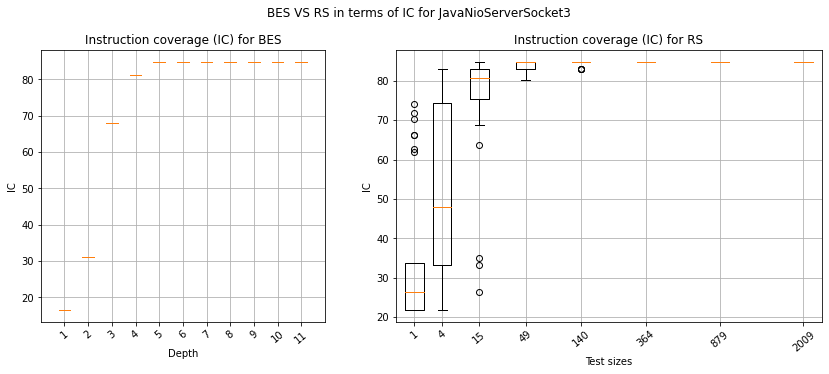

In [13]:
# ic
coverage = 'IC'
data_map['bes_title'] = f'Instruction coverage ({coverage}) for BES'
data_map['y_bes_label'] = coverage
# 'width_ratio': 1

data_map['rand_title'] = f'Instruction coverage ({coverage}) for RS'
data_map['y_rand_label'] = coverage
# 'width_ratio': 1.5


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', f'total_{coverage.lower()}',
                         u_bes, u_random, data_map)
    

depth 1 --> [1]
depth 2 --> [4]
depth 3 --> [15]
depth 4 --> [49]
depth 5 --> [140]
depth 6 --> [364]
depth 7 --> [879]
depth 8 --> [1999, 2000, 2001, 2002, 2003, 2004, 2006, 2008, 2009]
depth 9 --> [4384, 4385, 4386, 4387, 4388, 4389, 4391, 4392, 4393, 4394, 4401, 4376, 4377, 4378, 4380, 4382]
depth 10 --> [9350, 9354, 9355, 9356, 9357, 9358, 9359, 9361, 9363, 9364, 9366, 9368, 9372, 9374, 9376, 9381, 9383, 9384, 9385, 9390, 9394]
depth 11 --> [19781, 19785, 19789, 19791, 19794, 19795, 19797, 19798, 19800, 19802, 19803, 19804, 19805, 19808, 19810, 19812, 19815, 19822, 19823, 19825, 19827, 19835]


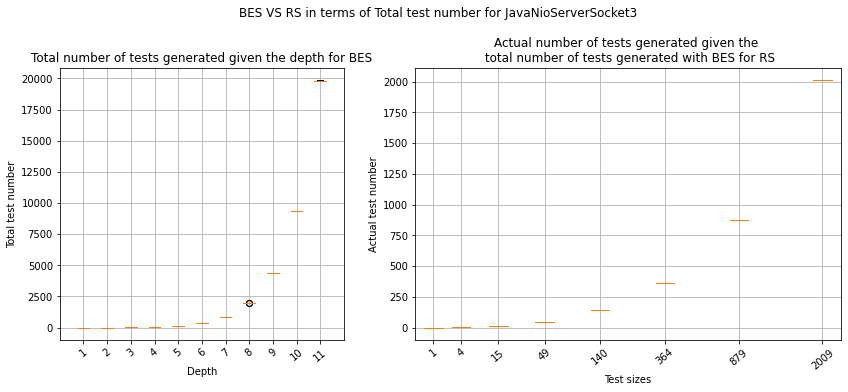

In [14]:
# total_test
creteria = 'total_tests'
data_map['bes_title'] = f'Total number of tests generated given the depth for BES'
data_map['y_bes_label'] = 'Total test number'
# 'width_ratio': 1
data_map['distance_to_figures'] = 1.05

data_map['rand_title'] = f'Actual number of tests generated given the \n total number of tests generated with BES for RS'
data_map['y_rand_label'] = 'Actual test number'
# 'width_ratio': 1.5

total_tests = extract_unique_as_map(bes_csv, u_bes, 'depth', creteria)
print_map(total_tests, 'depth')


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', creteria,
                         u_bes, u_random, data_map)



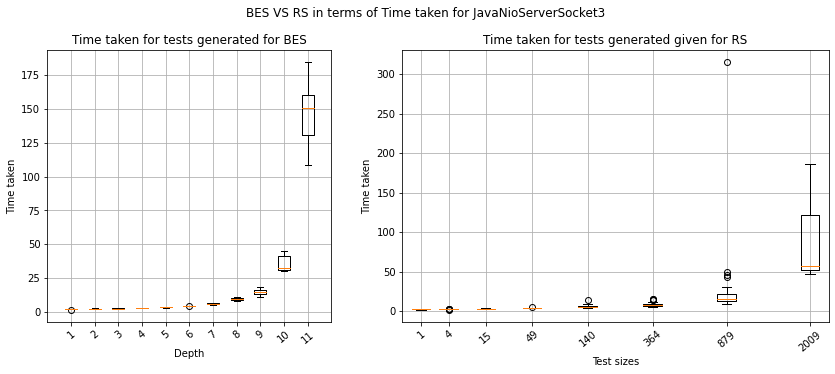

In [15]:
# time_taken
creteria = 'time_taken'
data_map['bes_title'] = f'Time taken for tests generated for BES'
data_map['y_bes_label'] = 'Time taken'
data_map['distance_to_figures'] = 1

data_map['rand_title'] = f'Time taken for tests generated given for RS'
data_map['y_rand_label'] = 'Time taken'
data_map['width_rand_ratio']: 1

time_taken = extract_unique_as_map(bes_csv, u_bes, 'depth', creteria)
# print_map(time_taken, 'depth')

compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', creteria,
                         u_bes, u_random, data_map)



In [16]:
# trie total path 
creteria = 'trie_total_path'


trie_total_path = extract_unique_as_map(bes_csv, u_bes, 'depth', creteria)
print_map(trie_total_path, 'depth')

print("**********************")
latex = to_latex('total trie path', trie_total_path)
print(latex)
print("**********************")

# fig, ax = plt.subplots(figsize=(12, 6))

data_map['bes_title'] = f'Total number of test generated by the \ntrie given the depth for BES'
data_map['y_bes_label'] = 'Total test number in the trie'

# plot_one_box(bes_csv, 'depth', creteria, u_bes, data_map)


depth 1 --> [1]
depth 2 --> [4]
depth 3 --> [15]
depth 4 --> [49]
depth 5 --> [151]
depth 6 --> [445]
depth 7 --> [1282]
depth 8 --> [3638]
depth 9 --> [10230]
depth 10 --> [28572]
depth 11 --> [79437]
**********************
\begin{table}[total trie path]
\begin{tabular}{|c|c|}
\hline
& Depth & Total number of tests generated by the trie \\ \hline \hline
1 & 1        \\ \hline
2 & 4        \\ \hline
3 & 15        \\ \hline
4 & 49        \\ \hline
5 & 151        \\ \hline
6 & 445        \\ \hline
7 & 1282        \\ \hline
8 & 3638        \\ \hline
9 & 10230        \\ \hline
10 & 28572        \\ \hline
11 & 79437        \\ \hline
\end{tabular}
\end{table}
**********************


trie_total   : [1, 4, 15, 49, 151, 445, 1282, 3638, 10230, 28572, 79437]
actual before: [1, 4, 15, 49, 140, 364, 879, 1999, 4384, 9350, 19781]
actual after : [1, 4, 15, 49, 140, 364, 879, 2009, 4384, 9350, 19781]
**********************
\begin{table}[trie vs actual]
\begin{tabular}{|c||c|c|}
\hline
& Depth & Total number of tests generated by the trie & Actual number of tests generated by Modbat \\ \hline \hline
1 & 1 & 1  \\ \hline
2 & 4 & 4  \\ \hline
3 & 15 & 15  \\ \hline
4 & 49 & 49  \\ \hline
5 & 151 & 140  \\ \hline
6 & 445 & 364  \\ \hline
7 & 1282 & 879  \\ \hline
8 & 3638 & 2009  \\ \hline
9 & 10230 & 4384  \\ \hline
10 & 28572 & 9350  \\ \hline
11 & 79437 & 19781  \\ \hline
\end{tabular}
\end{table}
**********************


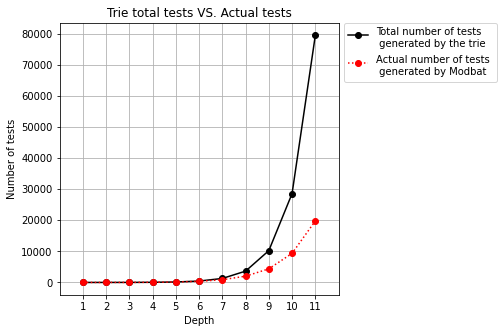

In [19]:
y1 = extract_unique_as_list(bes_csv, u_bes, 'depth', 'trie_total_path')
print(f'trie_total   : {y1}')
y2 = extract_unique_as_list(bes_csv, u_bes, 'depth', 'total_tests')
print(f'actual before: {y2}')
y2[7] = 2009
print(f'actual after : {y2}')


print("**********************")
latex = to_latex_compare('trie vs actual', u_bes, y1, y2)
print(latex)
print("**********************")




data_map['bes_title'] = f'Trie total tests VS. Actual tests'
data_map['x_bes_label'] = 'Depth'
data_map['y_bes_label'] = 'Number of tests'

data_map['y1_label'] = 'Total number of tests \n generated by the trie'
data_map['y2_label'] = 'Actual number of tests \n generated by Modbat'


plot_one_linear(u_bes, y1, y2, data_map)


In [18]:
# have a list of uniques depthes
# then for each depth a box plot of coverage of it and the corresponding depth



#make sure that the random didn't get a timeout before a depth





